In [ ]:
import glob
import shutil
import os
from pydub import AudioSegment
from colorama import Fore, Back, Style


conf_file =r'C:\Opensmile\opensmile-3.0-win-x64\config\mfcc\MFCC12_0_D_A_new.conf' 
audio_path=r'D:\wav\*.wav'
cvs_file=r'D:\mfccfeatures.csv'
path=r'C:\Opensmile\opensmile-3.0-win-x64\bin'


if os.path.exists(cvs_file):
    print(Fore.BLUE+"Deleteing old cvs file") ,print(Style.RESET_ALL)
    os.remove(cvs_file)


for file in glob.iglob (audio_path):
    print(Fore.MAGENTA+"Exracting features from", file),print(Style.RESET_ALL)
    try:
        audio = AudioSegment.from_wav(file)
        audio.export(file,format="wav")
        cmd = path + "./SMILExtract " + " -C " + conf_file +" -I " + file +" -O " +cvs_file
        os.system(cmd)
    except : print (Fore.YELLOW+ file," is empty !") ,print(Style.RESET_ALL) 
        
print("Done")

In [ ]:
#!pip install audb

# Import pandas
import pandas as pd
import re
 
# reading csv file
df=pd.read_csv(r"D:\D drive\Stress project\mfccfeatures.csv",sep=";")
search = []    
for values in df['name']:
    search.append(re.search(r'\w+\.(wav)', values).group())

df['name'] = search

In [ ]:
#df.to_csv(r"D:\jaysrawfilefeatures.csv")
#skip
#import pandas as pd
#df=pd.read_csv(r"D:\D drive\Stress project\mfccfeatures.csv",sep=";")
df.head()

In [ ]:
from ast import literal_eval
#del df['frameIndex']
#del df['frameTime']
df_1 = df.copy()
del df_1['frameIndex']
del df_1['frameTime']
df.drop(['frameIndex', 'frameTime', 'pcm_fftMag_mfcc_de[0]','pcm_fftMag_mfcc_de[1]','pcm_fftMag_mfcc_de[2]','pcm_fftMag_mfcc_de[3]','pcm_fftMag_mfcc_de[4]','pcm_fftMag_mfcc_de[5]','pcm_fftMag_mfcc_de[6]','pcm_fftMag_mfcc_de[7]',
         'pcm_fftMag_mfcc_de[8]','pcm_fftMag_mfcc_de[9]','pcm_fftMag_mfcc_de[10]','pcm_fftMag_mfcc_de[11]',
         'pcm_fftMag_mfcc_de[12]','pcm_fftMag_mfcc_de_de[0]','pcm_fftMag_mfcc_de_de[1]','pcm_fftMag_mfcc_de_de[2]',
         'pcm_fftMag_mfcc_de_de[3]','pcm_fftMag_mfcc_de_de[4]','pcm_fftMag_mfcc_de_de[5]','pcm_fftMag_mfcc_de_de[6]',
         'pcm_fftMag_mfcc_de_de[7]','pcm_fftMag_mfcc_de_de[8]','pcm_fftMag_mfcc_de_de[9]','pcm_fftMag_mfcc_de_de[10]',
         'pcm_fftMag_mfcc_de_de[11]','pcm_fftMag_mfcc_de_de[12]'], axis=1, inplace=True)

df2=df.groupby('name').agg(lambda x: list(x))
df_2=df_1.groupby('name').agg(lambda x: list(x))
#df2['features'].apply(lambda x: ast.literal_eval(x)).tolist()

#For 13 features
df2['features']= df2.values.tolist()
df2.reset_index(level=0, inplace=True)
df2['name'] = df2['name'].str.replace('.wav','',regex=False)

#For 39 features
df_2['features']= df_2.values.tolist()
df_2.reset_index(level=0, inplace=True)
df_2['name'] = df_2['name'].str.replace('.wav','',regex=False)

#df2.head()

In [ ]:
#For merging columns
df2.head()


In [ ]:
df_2.head()

In [ ]:
header = ['name','features']
#df3 = df2.reindex(columns=header)
df2.to_csv(r"D:\D drive\Stress project\mfccfeaturesready13.csv", columns = header, index=False, sep=',')
df_2.to_csv(r"D:\D drive\Stress project\mfccfeaturesready39.csv", columns = header, index=False, sep=',')

In [ ]:
#import pandas as pd
#import re
#df2=pd.read_csv("D:\jaysfeaturesready.csv",sep=",")
#df2.head()

In [ ]:
#from ast import literal_eval
#import pandas as pd

# convert the column during import
#df2 = pd.read_csv("D:\jaysfeaturesready.csv",sep=",", converters={'features': literal_eval})

In [ ]:
#df2['features'] = df2['features'].astype(float, errors = 'ignore')
#df2.features[0]
#header = ['name', 'features']
#df2.to_csv(r"D:\mfccfeaturesready.csv", columns = header, index=False, sep=',')

In [1]:
import numpy as np
import pandas as pd
import json
csv_data=pd.read_csv(r"D:\D drive\Stress project\mfccfeaturesready39.csv", sep=',').values
temp = []
temp1 = []
dictlist = []
dictlist1 = []
for audio in csv_data:
#    audio_name=audio[0]
#    print(audio_name)
    features_string=audio[1]
    #x1=np.array(features_string,dtype=float)
    #x1=np.array([np.array(xi) for xi in features_string])
    #x1=np.fromstring(features_string,dtype=float)
    x1 = np.asarray(json.loads(features_string), dtype=np.float32)
    x2 = np.mean(x1.T,axis=0)
    temp = audio[0]
    temp1 = x2
    dictlist.append(temp)
    dictlist1.append(temp1)
df8 = pd.DataFrame(list(zip(dictlist, dictlist1)),
               columns =['FILE', 'features'])


In [2]:
import numpy as np
import pandas as pd
import json
max_pad=3376
csv_data=pd.read_csv(r"D:\D drive\Stress project\mfccfeaturesready39.csv", sep=',').values
#csv_data=pd.read_csv('/home/jay_kejriwal/JAYBHAIcnn1.csv', sep=',').values
temp = []
temp1 = []
dictlist = []
dictlist1 = []
for audio in csv_data:
    features_string=audio[1]
    x1 = np.asarray(json.loads(features_string), dtype=np.float32)
    pad_width = max_pad - x1.shape[1]
    x2 = np.pad(x1, pad_width=((0, 0), (0, pad_width)), mode='constant')
    temp = audio[0]
    temp1 = x2
    dictlist.append(temp)
    dictlist1.append(temp1)
df9 = pd.DataFrame(list(zip(dictlist, dictlist1)),columns =['FILE', 'features'])   


In [3]:
#df2['features']=df2['features'].apply(np.array)
#df2['features'] = df2['features'].apply(lambda x: x.astype('float'))
#np.amax(df8['features'])
df8.to_pickle("xxxxmfcc_features3376_39features_1D.pkl",protocol=4)
df9.to_pickle("xxxxmfcc_features3376_39features_2D.pkl",protocol=4)

In [4]:
df8

,FILE,features
0,s01a_10a_crisis_1_0265,"[-3.7908356, -7.0894217, 5.152273, -23.238546,..."
1,s01a_10a_crisis_1_0266,"[-3.455318, -7.5760384, 4.556436, -20.08264, -..."
2,s01a_10a_crisis_1_0267,"[-5.5255575, -10.008731, 6.2429314, -18.98753,..."
3,s01a_10a_crisis_1_0268,"[-6.8184366, -6.213224, 6.330089, -17.130997, ..."
4,s01a_10a_crisis_1_0269,"[-8.12206, -7.660973, 8.351526, -20.514729, -8..."
...,...,...
13590,s29h_9c_crisis_3_0299,"[-13.144755, -15.662556, -11.597349, -29.91652..."
13591,s29h_9c_crisis_3_0300,"[-14.921526, -9.364187, -2.5051222, -36.134514..."
13592,s29h_9c_crisis_3_0301,"[-11.597138, -16.094143, -5.67251, -26.683786,..."
13593,s29h_9c_crisis_3_0302,"[-13.233461, -8.922029, -5.4360127, -27.970457..."


In [5]:
df8['features'].shape

(13595,)

In [6]:
df9

,FILE,features
0,s01a_10a_crisis_1_0265,"[[-13.86625, -18.47761, -14.26842, -12.02065, ..."
1,s01a_10a_crisis_1_0266,"[[-11.76748, -9.391284, -11.11567, -12.48359, ..."
2,s01a_10a_crisis_1_0267,"[[-7.418529, -12.53707, -15.07549, -12.09362, ..."
3,s01a_10a_crisis_1_0268,"[[-14.67007, -18.08006, -17.27793, -13.5949, -..."
4,s01a_10a_crisis_1_0269,"[[-11.4446, -14.79111, -14.48021, -14.97435, -..."
...,...,...
13590,s29h_9c_crisis_3_0299,"[[-31.29119, -34.56297, -36.48692, -37.79401, ..."
13591,s29h_9c_crisis_3_0300,"[[-30.87927, -24.32855, -25.49979, -38.1184, -..."
13592,s29h_9c_crisis_3_0301,"[[-24.92476, -26.53362, -31.47085, -31.33543, ..."
13593,s29h_9c_crisis_3_0302,"[[-41.68302, -42.73156, -42.78324, -40.58368, ..."


In [7]:
df9['features'].shape

(13595,)

In [8]:
metadata=pd.read_csv(r'C:\Users\Jay Kejriwal\Desktop\Jay\StressDat\modified.csv',sep="\t")

metadata.rename(columns={'V1': 'FILE', 'V2': 'Annotators', 'V3': 'SCORE'}, inplace=True)
# display updated DataFrame
metadata.head()

,FILE,Annotators,SCORE,SCALE
0,s06h_10b_crisis_2_0315,2,28.846021,Medium
1,s01a_6b_crisis_2_0170,2,32.322045,Medium
2,s07n_8a_crisis_1_0244,1,17.074338,Medium
3,s06h_9b_crisis_2_0284,2,43.659132,High
4,s03a_9a_crisis_1_0274,1,27.351947,Medium


In [ ]:
#Normalized score
import pandas as pd
import os
import librosa
import numpy as np
audio_dataset_path=r'C:\Users\Jay Kejriwal\Desktop\Jay\StressDat'
header_list = ["FILE", "Annotators", "SCORE"]
metadata=pd.read_csv(r'C:\Users\Jay Kejriwal\Desktop\Jay\StressDat\StressDat-anotacia-29spk_v1_normalize_all_scores.txt',sep="\t",names=header_list)
conditions = [
    (metadata['SCORE'] <= 20),
    (metadata['SCORE'] > 20) & (metadata['SCORE'] <= 40),
    (metadata['SCORE'] > 40)
    ]

# create a list of the values we want to assign for each condition
values = ['low', 'med', 'high']

# create a new column and use np.select to assign values to it using our lists as arguments
metadata['SCALE'] = np.select(conditions, values)
# display updated DataFrame
metadata.head()

In [ ]:
#Non normalized score
import pandas as pd
import os
import librosa
import numpy as np
audio_dataset_path=r'C:\Users\Jay Kejriwal\Desktop\Jay\StressDat'
#header_list = ["FILE", "Annotators", "SCORE"]
metadata=pd.read_csv(r'C:\Users\Jay Kejriwal\Desktop\Jay\StressDat\StressDat-anotacia-29spk_v1_normalized.txt',sep="\t")
conditions = [
    (metadata['SCORE'] <= 20),
    (metadata['SCORE'] > 20) & (metadata['SCORE'] <= 40),
    (metadata['SCORE'] > 40)
    ]

# create a list of the values we want to assign for each condition
values = ['low', 'med', 'high']

# create a new column and use np.select to assign values to it using our lists as arguments
metadata['SCALE'] = np.select(conditions, values)
# display updated DataFrame
metadata.head()

In [ ]:
#df4=df3.rename(columns={'name':'FILE'})
#df3=df2.rename(columns={"name": "FILE"}, inplace=True)

In [ ]:
#import pandas as pd
#df=pd.read_csv("D:\jaysfeaturesready.csv",sep=",",encoding='utf-8-sig')

In [ ]:
#metadata

In [ ]:
#df3

In [9]:
import pandas as pd
X1= pd.merge(metadata, df8, on='FILE', how='inner')
X2= pd.merge(metadata, df9, on='FILE', how='inner')

In [10]:
X1

,FILE,Annotators,SCORE,SCALE,features
0,s06h_10b_crisis_2_0315,2,28.846021,Medium,"[-6.885714, -0.036539752, -1.3000332, -12.0705..."
1,s01a_6b_crisis_2_0170,2,32.322045,Medium,"[-6.114928, -13.170886, 3.1732848, -16.58644, ..."
2,s07n_8a_crisis_1_0244,1,17.074338,Medium,"[-0.11982711, -4.6934714, 3.7333794, -18.66026..."
3,s06h_9b_crisis_2_0284,2,43.659132,High,"[-9.091105, -2.8438413, 2.1748102, -6.694515, ..."
4,s03a_9a_crisis_1_0274,1,27.351947,Medium,"[-17.674513, -10.407426, -10.38577, -15.515516..."
...,...,...,...,...,...
12783,s29h_18a_crisis_1_0493,1,11.326830,Low,"[-11.325671, 0.3797741, 1.0152626, -24.117195,..."
12784,s27h_19a_crisis_1_0537,1,5.753345,Low,"[-14.158362, -0.39813623, 0.47560015, -2.58148..."
12785,s26h_16b_crisis_2_0444,2,32.758280,Medium,"[2.4243116, -27.902876, 9.194534, -9.159864, -..."
12786,s25h_19a_crisis_1_0526,1,5.866519,Low,"[-16.77649, 4.831675, 10.54427, -0.12375169, -..."


In [11]:
X2

,FILE,Annotators,SCORE,SCALE,features
0,s06h_10b_crisis_2_0315,2,28.846021,Medium,"[[-16.02819, -16.8747, -18.12041, -19.82817, -..."
1,s01a_6b_crisis_2_0170,2,32.322045,Medium,"[[-13.09902, -8.843368, -14.96504, -12.98052, ..."
2,s07n_8a_crisis_1_0244,1,17.074338,Medium,"[[-5.357763, -7.482312, -9.288478, -5.790257, ..."
3,s06h_9b_crisis_2_0284,2,43.659132,High,"[[-20.14553, -20.75005, -18.78026, -19.34788, ..."
4,s03a_9a_crisis_1_0274,1,27.351947,Medium,"[[-18.3478, -26.09243, -31.76429, -28.83096, -..."
...,...,...,...,...,...
12783,s29h_18a_crisis_1_0493,1,11.326830,Low,"[[-20.48705, -22.83758, -29.1628, -29.91858, -..."
12784,s27h_19a_crisis_1_0537,1,5.753345,Low,"[[-19.12346, -21.15578, -17.01408, -19.01671, ..."
12785,s26h_16b_crisis_2_0444,2,32.758280,Medium,"[[-14.77532, -20.431, -23.46951, -24.38121, -1..."
12786,s25h_19a_crisis_1_0526,1,5.866519,Low,"[[-24.07748, -24.33992, -24.0927, -25.44589, -..."


In [12]:
extracted_features_df = X1[["SCALE","features"]]
extracted_features_df.columns=['class_label','feature']
extracted_features_df.to_pickle("newmfcc_features3376_39features_1D.pkl",protocol=4)
extracted_features_df1 = X2[["SCALE","features"]]
extracted_features_df1.columns=['class_label','feature']
extracted_features_df1.to_pickle("newmfcc_features3376_39features_2D.pkl",protocol=4)

In [ ]:
extracted_features_df['feature'].shape

In [ ]:
extracted_features_df

In [32]:
import pandas as pd
#extracted_features_df = pd.read_pickle("newmfcc_features3376_13features_1D.pkl")
#extracted_features_df = pd.read_pickle("newmfcc_features3376_39features_1D.pkl")
#extracted_features_df = pd.read_pickle("newplp_features3376_13features_1D.pkl")
extracted_features_df = pd.read_pickle("newplp_features3376_39features_1D.pkl")

In [33]:
import numpy as np
X=np.array(extracted_features_df['feature'].tolist())
y=np.array(extracted_features_df['class_label'].tolist())

In [34]:
X.shape

(12789, 39)

In [35]:
y.shape

(12789,)

In [36]:
y

array(['Medium', 'Medium', 'Medium', ..., 'Medium', 'Low', 'High'],
      dtype='<U6')

In [37]:
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder
labelencoder=LabelEncoder()
y=np.array(extracted_features_df['class_label'].tolist())
y=to_categorical(labelencoder.fit_transform(y))

In [99]:
y[1:10]
#yy[1:10]

array([[0., 0., 1.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.]], dtype=float32)

In [38]:
### Train Test Split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=27)

In [39]:
import tensorflow as tf
print(tf.__version__)

2.4.1


In [40]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout,Activation,Flatten
from tensorflow.keras.optimizers import Adam
from sklearn import metrics

In [41]:
### No of classes
num_labels=y.shape[1]

In [44]:
model=Sequential()
###first layer
model.add(Dense(100,input_shape=(39,)))
model.add(Activation('relu'))
model.add(Dropout(0.5))
###second layer
model.add(Dense(200))
model.add(Activation('relu'))
model.add(Dropout(0.5))
###third layer
model.add(Dense(100))
model.add(Activation('relu'))
model.add(Dropout(0.5))

###final layer
model.add(Dense(num_labels))
model.add(Activation('softmax'))

In [45]:
model.compile(loss='categorical_crossentropy',metrics=['accuracy'],optimizer='adam')

In [46]:
from tensorflow.keras.callbacks import ModelCheckpoint
from datetime import datetime 

num_epochs = 100
num_batch_size = 32

checkpointer = ModelCheckpoint(filepath='saved_models/audio_classification3.hdf5', 
                               verbose=1, save_best_only=True)
start = datetime.now()

model.fit(X_train, y_train, batch_size=num_batch_size, epochs=num_epochs, validation_data=(X_test, y_test), callbacks=[checkpointer], verbose=1)


duration = datetime.now() - start
print("Training completed in time: ", duration)

Epoch 1/100
320/320 [==============================] - 1s 2ms/step - loss: 1.1429 - accuracy: 0.3509 - val_loss: 0.9913 - val_accuracy: 0.5258

Epoch 00001: val_loss improved from inf to 0.99134, saving model to saved_models\audio_classification3.hdf5
Epoch 2/100
320/320 [==============================] - 1s 2ms/step - loss: 1.0013 - accuracy: 0.4858 - val_loss: 0.8664 - val_accuracy: 0.5766

Epoch 00002: val_loss improved from 0.99134 to 0.86644, saving model to saved_models\audio_classification3.hdf5
Epoch 3/100
320/320 [==============================] - 1s 2ms/step - loss: 0.9111 - accuracy: 0.5483 - val_loss: 0.8260 - val_accuracy: 0.5989

Epoch 00003: val_loss improved from 0.86644 to 0.82599, saving model to saved_models\audio_classification3.hdf5
Epoch 4/100
320/320 [==============================] - 1s 2ms/step - loss: 0.8720 - accuracy: 0.5708 - val_loss: 0.8038 - val_accuracy: 0.6286

Epoch 00004: val_loss improved from 0.82599 to 0.80375, saving model to saved_models\audio_c

320/320 [==============================] - 1s 2ms/step - loss: 0.7034 - accuracy: 0.6760 - val_loss: 0.6488 - val_accuracy: 0.7134

Epoch 00038: val_loss improved from 0.65448 to 0.64878, saving model to saved_models\audio_classification3.hdf5
Epoch 39/100
320/320 [==============================] - 1s 2ms/step - loss: 0.6976 - accuracy: 0.6851 - val_loss: 0.6625 - val_accuracy: 0.7138

Epoch 00039: val_loss did not improve from 0.64878
Epoch 40/100
320/320 [==============================] - 1s 2ms/step - loss: 0.6848 - accuracy: 0.6862 - val_loss: 0.6836 - val_accuracy: 0.6876

Epoch 00040: val_loss did not improve from 0.64878
Epoch 41/100
320/320 [==============================] - 1s 2ms/step - loss: 0.6904 - accuracy: 0.6837 - val_loss: 0.6505 - val_accuracy: 0.7150

Epoch 00041: val_loss did not improve from 0.64878
Epoch 42/100
320/320 [==============================] - 1s 2ms/step - loss: 0.6829 - accuracy: 0.6849 - val_loss: 0.6573 - val_accuracy: 0.7177

Epoch 00042: val_loss d

320/320 [==============================] - 1s 2ms/step - loss: 0.6913 - accuracy: 0.6842 - val_loss: 0.7077 - val_accuracy: 0.6904

Epoch 00079: val_loss did not improve from 0.63610
Epoch 80/100
320/320 [==============================] - 1s 2ms/step - loss: 0.6876 - accuracy: 0.6900 - val_loss: 0.6740 - val_accuracy: 0.7013

Epoch 00080: val_loss did not improve from 0.63610
Epoch 81/100
320/320 [==============================] - 1s 2ms/step - loss: 0.6768 - accuracy: 0.6883 - val_loss: 0.6529 - val_accuracy: 0.7213

Epoch 00081: val_loss did not improve from 0.63610
Epoch 82/100
320/320 [==============================] - 1s 2ms/step - loss: 0.6907 - accuracy: 0.6804 - val_loss: 0.6559 - val_accuracy: 0.7244

Epoch 00082: val_loss did not improve from 0.63610
Epoch 83/100
320/320 [==============================] - 1s 2ms/step - loss: 0.6779 - accuracy: 0.6906 - val_loss: 0.6612 - val_accuracy: 0.7185

Epoch 00083: val_loss did not improve from 0.63610
Epoch 84/100
320/320 [===========

In [47]:
train_accuracy=model.evaluate(X_train,y_train,verbose=0)
test_accuracy=model.evaluate(X_test,y_test,verbose=0)
print(train_accuracy[1])
print(test_accuracy[1])

0.7217280864715576
0.7251759171485901


In [19]:
#For mfcc 13 features 1D
##0.6095796823501587
##0.5957779288291931

#For plp 13 features 1D
#0.7189912796020508
#0.7193119525909424
from sklearn.metrics import classification_report, confusion_matrix

print("For Test Data: Full Classification Report ")
Y_test = np.argmax(y_test, axis=1) # Convert one-hot to index
y_pred = model.predict_classes(X_test)
print(confusion_matrix(Y_test,y_pred))
print(classification_report(Y_test, y_pred))



For Test Data: Full Classification Report 
[[575  13 278]
 [  5 637 182]
 [ 73 167 628]]
              precision    recall  f1-score   support

           0       0.88      0.66      0.76       866
           1       0.78      0.77      0.78       824
           2       0.58      0.72      0.64       868

    accuracy                           0.72      2558
   macro avg       0.75      0.72      0.73      2558
weighted avg       0.75      0.72      0.72      2558



C:\Users\Jay Kejriwal\AppData\Roaming\Python\Python38\site-packages\tensorflow\python\keras\engine\sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


In [48]:
#For mfcc 39 features 1D
#0.6368523836135864
#0.623924970626831

#For plp 39 features 1D
#0.7217280864715576
#0.7251759171485901
from sklearn.metrics import classification_report, confusion_matrix

print("For Test Data: Full Classification Report ")
Y_test = np.argmax(y_test, axis=1) # Convert one-hot to index
y_pred = model.predict_classes(X_test)
print(confusion_matrix(Y_test,y_pred))
print(classification_report(Y_test, y_pred))



For Test Data: Full Classification Report 
[[600  15 251]
 [  6 648 170]
 [ 84 177 607]]
              precision    recall  f1-score   support

           0       0.87      0.69      0.77       866
           1       0.77      0.79      0.78       824
           2       0.59      0.70      0.64       868

    accuracy                           0.73      2558
   macro avg       0.74      0.73      0.73      2558
weighted avg       0.74      0.73      0.73      2558



C:\Users\Jay Kejriwal\AppData\Roaming\Python\Python38\site-packages\tensorflow\python\keras\engine\sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


In [ ]:
#For normalized dataset
#0.654180109500885
#0.6531408429145813

#For non-normalized score
#0.6184763312339783
#0.6115332245826721


#For normalized dataset librosa settings
#0.6336942911148071
#0.6348029375076294

#0.6662764549255371
#0.6699180603027344

In [49]:
from kerastuner import RandomSearch
import keras_tuner
from kerastuner.engine.hyperparameters import HyperParameters
from tensorflow import keras

In [50]:
X_train_cnn = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test_cnn = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)
Y_train_ann_cnn = y_train
Y_test_ann_cnn = y_test
num_classes = 3

In [51]:
def build_model(hp):  
  model = keras.Sequential([
    keras.layers.Conv1D(
        filters=hp.Int('conv_1_filter', min_value=32, max_value=128, step=16),
        kernel_size=hp.Choice('conv_1_kernel', values = [2,5]),
        activation='relu',
        input_shape=X_train_cnn.shape[1:]
    ),
    keras.layers.Conv1D(
        filters=hp.Int('conv_2_filter', min_value=32, max_value=64, step=16),
        kernel_size=hp.Choice('conv_2_kernel', values = [2,5]),
        activation='relu'
    ),

    keras.layers.Flatten(),
    keras.layers.Dense(
        units=hp.Int('dense_1_units', min_value=32, max_value=256, step=16),
        activation='relu'
    ),
    keras.layers.Dense(num_classes, activation='softmax')
  ])
  
  model.compile(optimizer=keras.optimizers.Adam(hp.Choice('learning_rate', values=[1e-2, 1e-3])),
              loss='categorical_crossentropy',
              metrics=['accuracy'])
  
  return model


In [52]:
tuner_search=RandomSearch(build_model,
                          objective='val_accuracy',
                          max_trials=5,directory='output',project_name="Stress_clasification_plp1D39")

In [53]:
tuner_search.search(X_train_cnn, Y_train_ann_cnn, epochs=10,validation_split=0.2)

Trial 5 Complete [00h 00m 17s]
val_accuracy: 0.6257938742637634

Best val_accuracy So Far: 0.6888129115104675
Total elapsed time: 00h 01m 10s
INFO:tensorflow:Oracle triggered exit


In [54]:
model=tuner_search.get_best_models(num_models=1)[0]

In [55]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d (Conv1D)              (None, 38, 80)            240       
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 34, 32)            12832     
_________________________________________________________________
flatten (Flatten)            (None, 1088)              0         
_________________________________________________________________
dense (Dense)                (None, 144)               156816    
_________________________________________________________________
dense_1 (Dense)              (None, 3)                 435       
Total params: 170,323
Trainable params: 170,323
Non-trainable params: 0
_________________________________________________________________


In [56]:
model.fit(X_train_cnn, Y_train_ann_cnn, epochs=30, validation_split=0.2, initial_epoch=10)
train_accuracy=model.evaluate(X_train_cnn,Y_train_ann_cnn,verbose=0)
test_accuracy=model.evaluate(X_test_cnn,Y_test_ann_cnn,verbose=0)
print(train_accuracy[1])
print(test_accuracy[1])

Epoch 11/30
256/256 [==============================] - 2s 5ms/step - loss: 0.6506 - accuracy: 0.7050 - val_loss: 0.7845 - val_accuracy: 0.6214
Epoch 12/30
256/256 [==============================] - 1s 4ms/step - loss: 0.6737 - accuracy: 0.6911 - val_loss: 0.6658 - val_accuracy: 0.6844
Epoch 13/30
256/256 [==============================] - 1s 4ms/step - loss: 0.6449 - accuracy: 0.7110 - val_loss: 0.6864 - val_accuracy: 0.6825
Epoch 14/30
256/256 [==============================] - 1s 4ms/step - loss: 0.6599 - accuracy: 0.6951 - val_loss: 0.6699 - val_accuracy: 0.6908
Epoch 15/30
256/256 [==============================] - 1s 4ms/step - loss: 0.6347 - accuracy: 0.7157 - val_loss: 0.9722 - val_accuracy: 0.5447
Epoch 16/30
256/256 [==============================] - 1s 4ms/step - loss: 0.6525 - accuracy: 0.7017 - val_loss: 0.6956 - val_accuracy: 0.6580
Epoch 17/30
256/256 [==============================] - 1s 4ms/step - loss: 0.6494 - accuracy: 0.7048 - val_loss: 0.6741 - val_accuracy: 0.6898

In [28]:
#For mfcc 13 features 1D
###0.8489736318588257
###0.70719313621521
#For plp 13 features 1D
#0.7520281672477722
#0.7111024260520935
from sklearn.metrics import classification_report, confusion_matrix

print("For Test Data: Full Classification Report ")
Y_test = np.argmax(Y_test_ann_cnn, axis=1) # Convert one-hot to index
y_pred = np.argmax(model.predict(X_test_cnn),axis=-1)
matrix=confusion_matrix(Y_test,y_pred)
print(matrix)
print(classification_report(Y_test, y_pred))



For Test Data: Full Classification Report 
[[710  14 142]
 [ 19 608 197]
 [208 159 501]]
              precision    recall  f1-score   support

           0       0.76      0.82      0.79       866
           1       0.78      0.74      0.76       824
           2       0.60      0.58      0.59       868

    accuracy                           0.71      2558
   macro avg       0.71      0.71      0.71      2558
weighted avg       0.71      0.71      0.71      2558



[[710  14 142]
 [ 19 608 197]
 [208 159 501]]


<ipython-input-31-382279d99293>:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([''] + labels)
<ipython-input-31-382279d99293>:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([''] + labels)


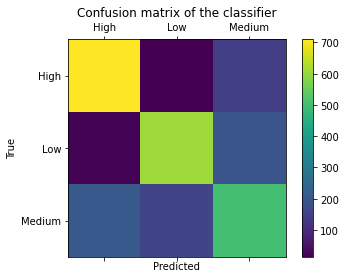

In [31]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
cm = confusion_matrix(Y_test,y_pred)
print(cm)
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(cm)
plt.title('Confusion matrix of the classifier')
fig.colorbar(cax)
labels=['High','Low','Medium']
ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [78]:
class_label=extracted_features_df['class_label']
plot_confusion_matrix(Y_test, y_pred, classes=class_label, cmap=plt.cm.Blues)
plt.show()

TypeError: string indices must be integers

In [57]:
#For mfcc 39 features 1D
##0.8137829899787903
##0.7126661539077759

#For plp 39 features 1D
##0.7430358529090881
##0.7259577512741089

from sklearn.metrics import classification_report, confusion_matrix

print("For Test Data: Full Classification Report ")
Y_test = np.argmax(Y_test_ann_cnn, axis=1) # Convert one-hot to index
y_pred = model.predict_classes(X_test_cnn)
print(confusion_matrix(Y_test,y_pred))
print(classification_report(Y_test, y_pred))



For Test Data: Full Classification Report 


C:\Users\Jay Kejriwal\AppData\Roaming\Python\Python38\site-packages\tensorflow\python\keras\engine\sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


[[682  31 153]
 [ 13 668 143]
 [132 229 507]]
              precision    recall  f1-score   support

           0       0.82      0.79      0.81       866
           1       0.72      0.81      0.76       824
           2       0.63      0.58      0.61       868

    accuracy                           0.73      2558
   macro avg       0.73      0.73      0.73      2558
weighted avg       0.73      0.73      0.72      2558

